#A - Objective and Overview

## **Objective**

Use unsupervised learning to cluster similar running backs together, in an attempt to improve fantasy football draft decisions

## **Feature Description:**
**DP**: draft pick where player was selected in the NFL draft

**Rush_ATT_per_GP**: rushing attempts per game

**Rush_Yards_per_GP**: rushing yards per game

**Rush_TDs_per_GP**: rushing touchdownds per game

**Yards_per_Carry**: rushing yards per carry (rushing attempt)

**REC_per_GP**: receptions per game

**REC_Yards_per_GP**: receiving yards per game

**REC_TDs_per_GP**: receiving touchdowns per game

**Yards_per_REC**: yards gained per receptions

**Touches_per_GP**: touches per game

**PPR_per_GP**: average fantasy points per game (PPR style scoring) in college

**Combined_RUSH_MS**: a metric designed to represent a player's production in their team's rushing offense.

**Combined_REC_MS**: a metric designed to represent a player's receiving production in their college offense

**RUSH_CD**: a metric that equally weighs the career last and career best seasons in terms of market share of team rushing yards and rushing touchdowns.

**REC_CD**: represents the player's percentage of their team's offense in respect to the team's yardage and touchdowns

**RB_BOA**: the age in a season a running back first achieves a greater than 15% scrimmage dominator rating.

**BMI**: body mass index (BMI) recorded during the NFL Combine. Formula = Mass (lb) / Height (in)^2 x 703

**forty_time**: time it takes a player to complete a sprint measuring 40 yards. Times not recorded at the NFL combine are adjusted by adding .05 seconds to the player time.

**Agility_Score**: a metric intended to measure a player's lateral agility and quickness

**Broad**: measures the player's ability to jump horizontally from a balanced stance

**three_cone**: measures a player's ability to change directions as they run around 3 cones placed in an L-shape

**Power_5_Conference**: indicates whether the player played for a school belonging in one of the 'Power 5 Conferences' (Big 10, Big 12, ACC, SEC, or PAC-12) (0 = No, 1 = Yes)

**Early_Declare**: indicates whether a player declared for the NFL draft before his senior year season (0 = No, 1 = Yes)

## **Recognition:**
Credit to FF_Spaceman for the dataset. Data source: https://www.patreon.com/posts/post-draft-65853161*

*dataset has been updated with RB class of 2022 NFL stats

#B - Setup

##1.0 Import Libraries and Read Dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

from tensorflow import keras
from keras import backend as K

from sklearn.model_selection import GridSearchCV
from math import sqrt

from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

In [68]:
df = pd.read_csv('2022_RB_Database.csv', header = 2)

##2.0 Preview Data

In [69]:
df.head()

,Player,NFL Player ID,School,Conf,DOB,DR,DP,Draft_Year,Draft_Age,NCAA_Szns,...,40_time,Bench.1,Vertical.1,Broad.1,Shuttle.1,3 Cone,Top_5_RB,Top_12_RB,Top_24_RB,AVG_PPG_YR_1_3
0,Abram Smith,NaN,Baylor,Big 12,9/14/1998,UDFA,UDFA,2022,23,4,...,4.50,13,36.0,116,4.40,7.25,-,-,-,-
1,Amir Rasul,NaN,Middle Tennessee ST,CUSA,6/9/1998,UDFA,UDFA,2022,24,4,...,4.62,-,30.0,119,4.40,7.41,-,-,-,-
2,BJ Baylor,NaN,Oregon ST,Pac-12,9/8/1999,UDFA,UDFA,2022,22,4,...,4.55,12,35.5,124,4.34,7.03,-,-,-,-
3,Breece Hall,NaN,Iowa ST,Big 12,5/31/2001,2,36,2022,21,3,...,-,-,-,-,-,-,-,-,-,16.40
4,Brian Robinson,NaN,Alabama,SEC,3/22/1999,3,98,2022,23,5,...,-,-,-,-,4.59,7.33,-,-,-,9.40


In [70]:
df.describe()

,Draft_Year,Draft_Age,NCAA_Szns,18,19,20,21,22,23,18.1,...,Return TDs/GP.3,Total Touches.3,Total Touches/GP.3,Total Yards.3,Total Yards/GP.3,Total TDs.3,Total TDs/GP.3,RUSH_CD,REC_CD,SCRIM_CD
count,602.000000,602.000000,602.000000,269.000000,450.000000,531.000000,477.000000,270.000000,70.000000,269.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,2013.632890,22.340532,3.441860,9.773234,10.306667,10.832392,11.098532,11.037037,11.071429,84.933086,...,0.009412,157.830565,13.960465,995.619601,87.898671,8.514950,0.742691,0.458704,0.072209,0.251561
std,5.727284,0.900352,0.801896,3.250240,3.296647,2.930028,2.686087,2.793799,2.639288,70.053625,...,0.028118,63.381589,4.942080,413.819488,31.892456,4.487061,0.371651,0.176493,0.054598,0.097102
min,2003.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,...,0.000000,7.000000,1.200000,34.000000,5.600000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2009.000000,22.000000,3.000000,8.000000,9.000000,10.000000,10.000000,10.000000,10.250000,29.000000,...,0.000000,112.250000,10.525000,681.500000,63.800000,5.000000,0.500000,0.340000,0.030000,0.180000
50%,2014.000000,22.000000,4.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,64.000000,...,0.000000,152.500000,13.600000,958.500000,86.200000,8.000000,0.700000,0.450000,0.060000,0.250000
75%,2019.000000,23.000000,4.000000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,129.000000,...,0.000000,200.750000,17.300000,1271.750000,108.650000,11.000000,0.900000,0.590000,0.100000,0.310000
max,2022.000000,25.000000,5.000000,15.000000,15.000000,15.000000,15.000000,16.000000,14.000000,299.000000,...,0.351000,325.000000,28.300000,2329.000000,188.200000,31.000000,2.800000,0.940000,0.550000,0.560000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Columns: 601 entries, Player to AVG_PPG_YR_1_3
dtypes: float64(329), int64(68), object(204)
memory usage: 2.8+ MB


##3.0 Data Preprocessing, Cleaning, and Feature Engineering

###3.1 Select Columns of Interest

In [72]:
draft_df = df[['Player', 
               'Conf',
               'DR', 
               'DP', 
               'Draft_Year', 
               'Draft_Age', 
               'NCAA_Szns',
               #'GP',
               #'REC',
               'Rush_ATT_per_GP',
               'Rush_Yards_per_GP',
               'Rush_TDs_per_GP',
               'Yards_per_Carry',
               'REC_per_GP',
               #'REC_Yards',
               'REC_Yards_per_GP',
               #'REC_TDs',
               'REC_TDs_per_GP',
               'Yards_per_REC',
               'Touches_per_GP',
               #'PPR_Points',
               'PPR_per_GP',
               #'PPR_per_Touch',
               #'Total_Touches',
               #'REC_MS',
               #'REC_Yards_MS',
               #'REC_TDs_MS',
               'Combined_RUSH_MS',
               'Combined_REC_MS',
               'Yds_per_Carry_Over_TM_AVG',
               'Yards_per_TM_Rush_ATT',
               #'RecPTMPA',
               #'REC_Yards_per_TM_PA',
               #'REC_TDS_per_TM_PA',
               'RUSH_CD',
               'REC_CD',
               'RB_BOA',
               'BMI',
               #'Hand_Size',
               #'Arm_Length',
               'forty_time',
               'Agility_Score',
               'Broad',
               'three_cone',
               #'Burst_Score',
               'Top_5_RB',
               'Top_12_RB',
               'Top_24_RB',
               'AVG_PPG_YR_1_3']]


###3.2 Remove Undrafted Free Agents (UDFA) from Dataset

In [73]:
#Remove undrafted players from dataset
draft_df = draft_df[draft_df.DR != 'UDFA']

###3.3 Replace and Convert Non-numeric Data to Numeric

In [74]:
#replace '-' with 24, indicating they did not breakout in college (assuming college years age 18-23)
draft_df['RB_BOA'] = draft_df['RB_BOA'].replace('-',24)

draft_df['Top_5_RB'] = draft_df['Top_5_RB'].replace('-',0)
draft_df['Top_12_RB'] = draft_df['Top_12_RB'].replace('-',0)
draft_df['Top_24_RB'] = draft_df['Top_24_RB'].replace('-',0)

#Replace non-numeric values
draft_df['BMI'] = draft_df['BMI'].replace('-',np.nan);
draft_df['forty_time'] = draft_df['forty_time'].replace('-',np.nan);
draft_df['Agility_Score'] = draft_df['Agility_Score'].replace('-',np.nan);
#draft_df['Burst_Score'] = draft_df['Burst_Score'].replace('-',np.nan);
draft_df['Broad'] = draft_df['Broad'].replace('-',np.nan);
draft_df['three_cone'] = draft_df['three_cone'].replace('-',np.nan);
draft_df['AVG_PPG_YR_1_3'] = draft_df['AVG_PPG_YR_1_3'].replace('-',0.0);
draft_df['Yards_per_REC'] = draft_df['Yards_per_REC'].replace('-',0.0)


#convert data types to float
draft_df["DR"] = draft_df.DR.astype(float)
draft_df["DP"] = draft_df.DP.astype(float)
draft_df["RB_BOA"] = draft_df.RB_BOA.astype(float)
draft_df["BMI"] = draft_df.BMI.astype(float)
draft_df["forty_time"] = draft_df.forty_time.astype(float)
draft_df["Agility_Score"] = draft_df.Agility_Score.astype(float)
#draft_df["Burst_Score"] = draft_df.Burst_Score.astype(float)
draft_df["AVG_PPG_YR_1_3"] = draft_df.AVG_PPG_YR_1_3.astype(float)
draft_df["Yards_per_REC"] = draft_df.Yards_per_REC.astype(float)
draft_df["Broad"] = draft_df.Broad.astype(float)
draft_df["three_cone"] = draft_df.three_cone.astype(float)

draft_df["Top_5_RB"] = draft_df.Top_5_RB.astype(float)
draft_df["Top_12_RB"] = draft_df.Top_12_RB.astype(float)
draft_df["Top_24_RB"] = draft_df.Top_24_RB.astype(float)

#Replace NaN with median
draft_df['BMI'] = draft_df['BMI'].fillna(draft_df['BMI'].median())
draft_df['forty_time'] = draft_df['forty_time'].fillna(draft_df['forty_time'].median())
draft_df['Agility_Score'] = draft_df['Agility_Score'].fillna(draft_df['Agility_Score'].median())
#draft_df['Burst_Score'] = draft_df['Burst_Score'].fillna(draft_df['Burst_Score'].median())
draft_df['Broad'] = draft_df['Broad'].fillna(draft_df['Broad'].median())
draft_df['three_cone'] = draft_df['three_cone'].fillna(draft_df['three_cone'].median())


###3.4 Feature Engineering

In [75]:
#Create Power 5 Conference column based on college Conference column
draft_df['Power_5_Conference'] = np.nan
draft_df['Power_5_Conference'] = np.where((draft_df.Conf == 'ACC') | (draft_df.Conf == 'Big Ten') | (draft_df.Conf == 'Big 12') | (draft_df.Conf == 'Pac-12') | (draft_df.Conf == 'SEC'),1, 0)

#Create Early Declare column based on # of NCAA Seasons column
draft_df['Early_Declare'] = np.nan
draft_df['Early_Declare'] = np.where((draft_df.NCAA_Szns <= 3),1, 0)

#drop columns
draft_df = draft_df.drop(['Conf','NCAA_Szns'],axis = 1)

In [76]:
#Move AVG_PPG_YR_1_3 column to end of dataframe
df1 = draft_df.pop('AVG_PPG_YR_1_3')
draft_df['AVG_PPG_YR_1_3']=df1 

In [77]:
draft_df.head()

,Player,DR,DP,Draft_Year,Draft_Age,Rush_ATT_per_GP,Rush_Yards_per_GP,Rush_TDs_per_GP,Yards_per_Carry,REC_per_GP,...,forty_time,Agility_Score,Broad,three_cone,Top_5_RB,Top_12_RB,Top_24_RB,Power_5_Conference,Early_Declare,AVG_PPG_YR_1_3
3,Breece Hall,2.0,36.0,2022,21,19.9,109.5,1.39,5.5,2.3,...,4.39,11.28,126.0,7.01,0.0,0.0,0.0,1,1,16.4
4,Brian Robinson,3.0,98.0,2022,23,9.9,49.2,0.53,5.0,0.9,...,4.53,11.92,119.0,7.01,0.0,0.0,0.0,1,0,9.4
5,Brittain Brown,7.0,250.0,2022,24,9.7,54.4,0.50,5.6,1.0,...,4.52,11.43,120.0,7.01,0.0,0.0,0.0,1,0,0.0
8,Dameon Pierce,4.0,107.0,2022,22,6.9,37.6,0.48,5.5,0.9,...,4.59,11.99,119.0,7.01,0.0,0.0,0.0,1,0,12.8
11,Hassan Haskins,4.0,131.0,2022,22,14.1,72.6,0.94,5.1,0.8,...,4.52,11.28,120.0,7.01,0.0,0.0,0.0,1,1,1.9


#C - Exploratory Data Analysis (EDA)

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

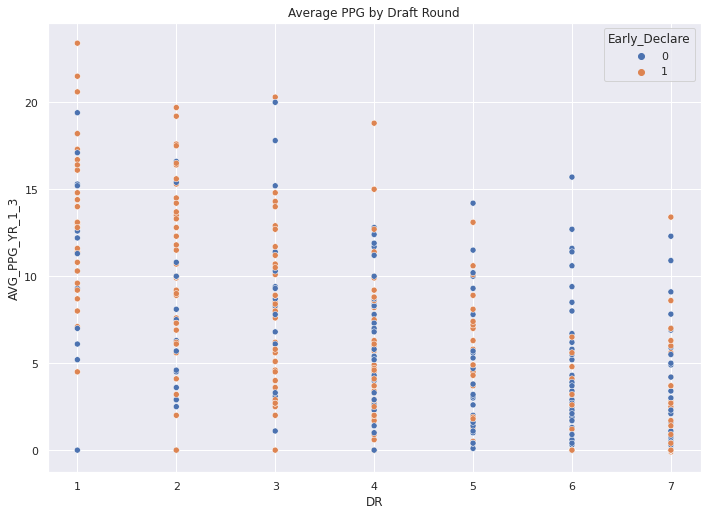

In [78]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='DR', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

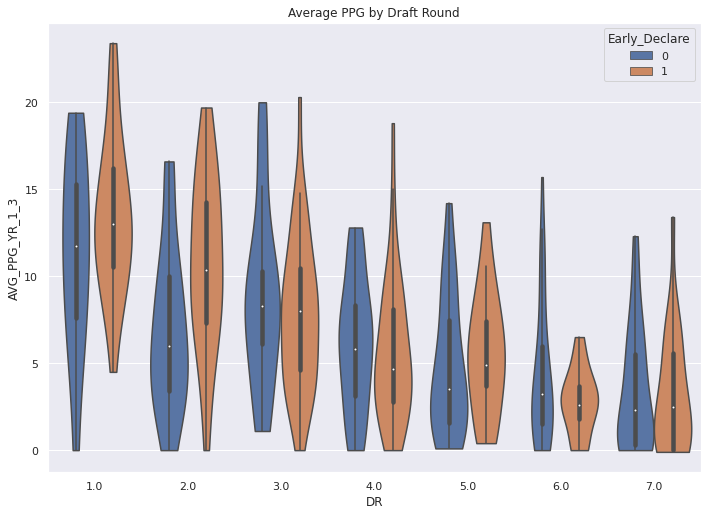

In [79]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(data=draft_df, x='DR', y="AVG_PPG_YR_1_3", hue = 'Early_Declare', cut=0).set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Pick')]

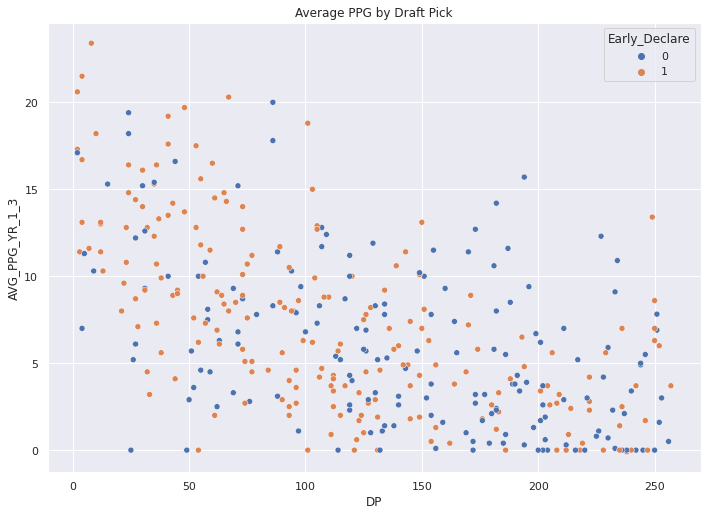

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='DP', y="AVG_PPG_YR_1_3", hue='Early_Declare').set(title = 'Average PPG by Draft Pick')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

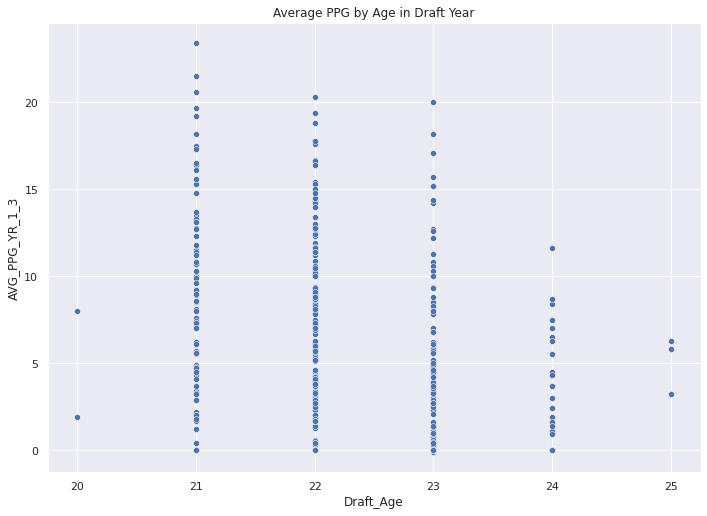

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='Draft_Age', y="AVG_PPG_YR_1_3").set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

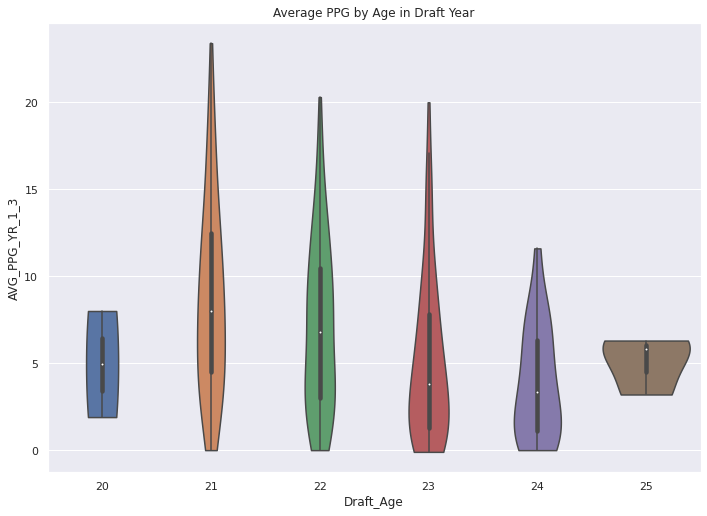

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(data=draft_df, x='Draft_Age', y="AVG_PPG_YR_1_3", cut=0).set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Early Declare Status')]

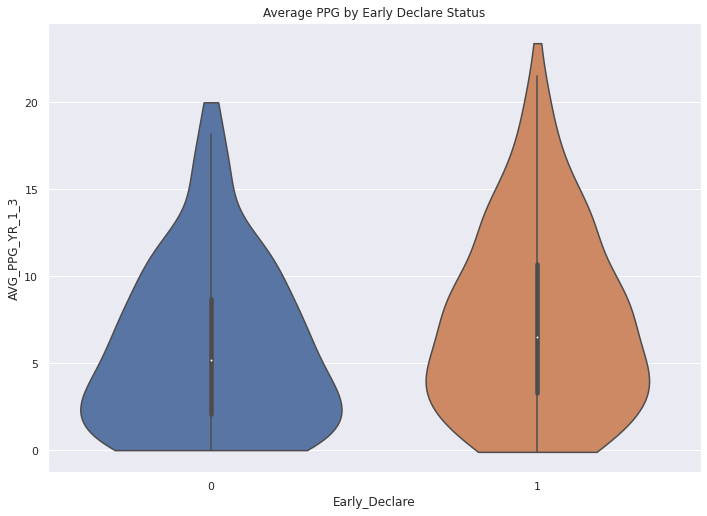

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(data=draft_df, x='Early_Declare', y="AVG_PPG_YR_1_3", cut=0).set(title = 'Average PPG by Early Declare Status')

[Text(0.5, 1.0, 'Average PPG by BMI')]

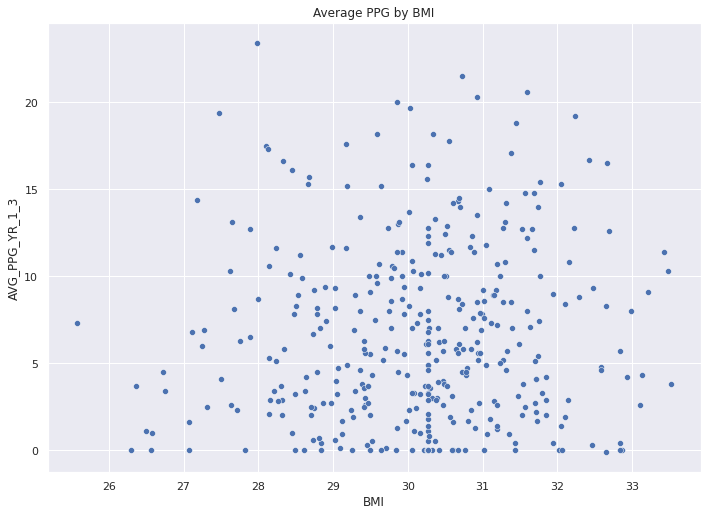

In [84]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='BMI', y="AVG_PPG_YR_1_3").set(title = 'Average PPG by BMI')

[Text(0.5, 1.0, 'Average PPG by Combined Rushing Market Share')]

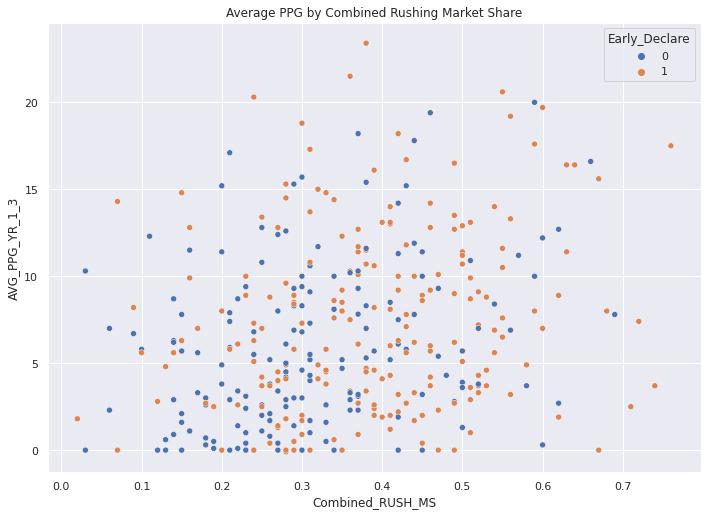

In [85]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='Combined_RUSH_MS', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Combined Rushing Market Share')

[Text(0.5, 1.0, 'Average PPG by College Dominator Rating')]

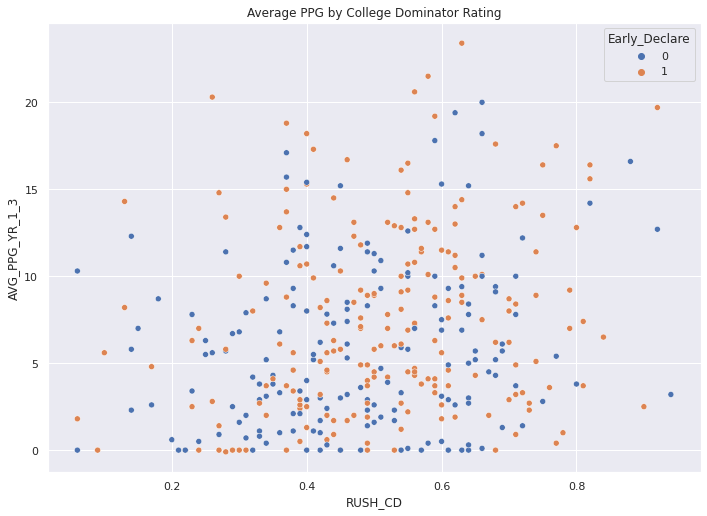

In [86]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.scatterplot(data=draft_df, x='RUSH_CD', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by College Dominator Rating')

[Text(0.5, 1.0, 'Average PPG by RB Breakout Age')]

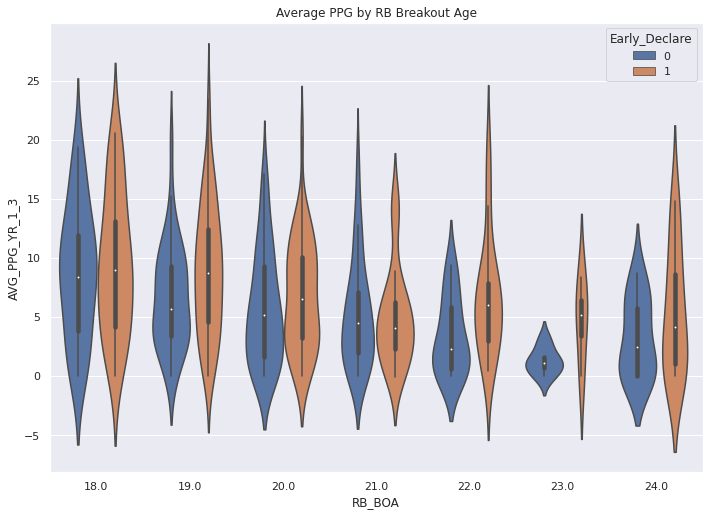

In [87]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.violinplot(data=draft_df, x='RB_BOA', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by RB Breakout Age')

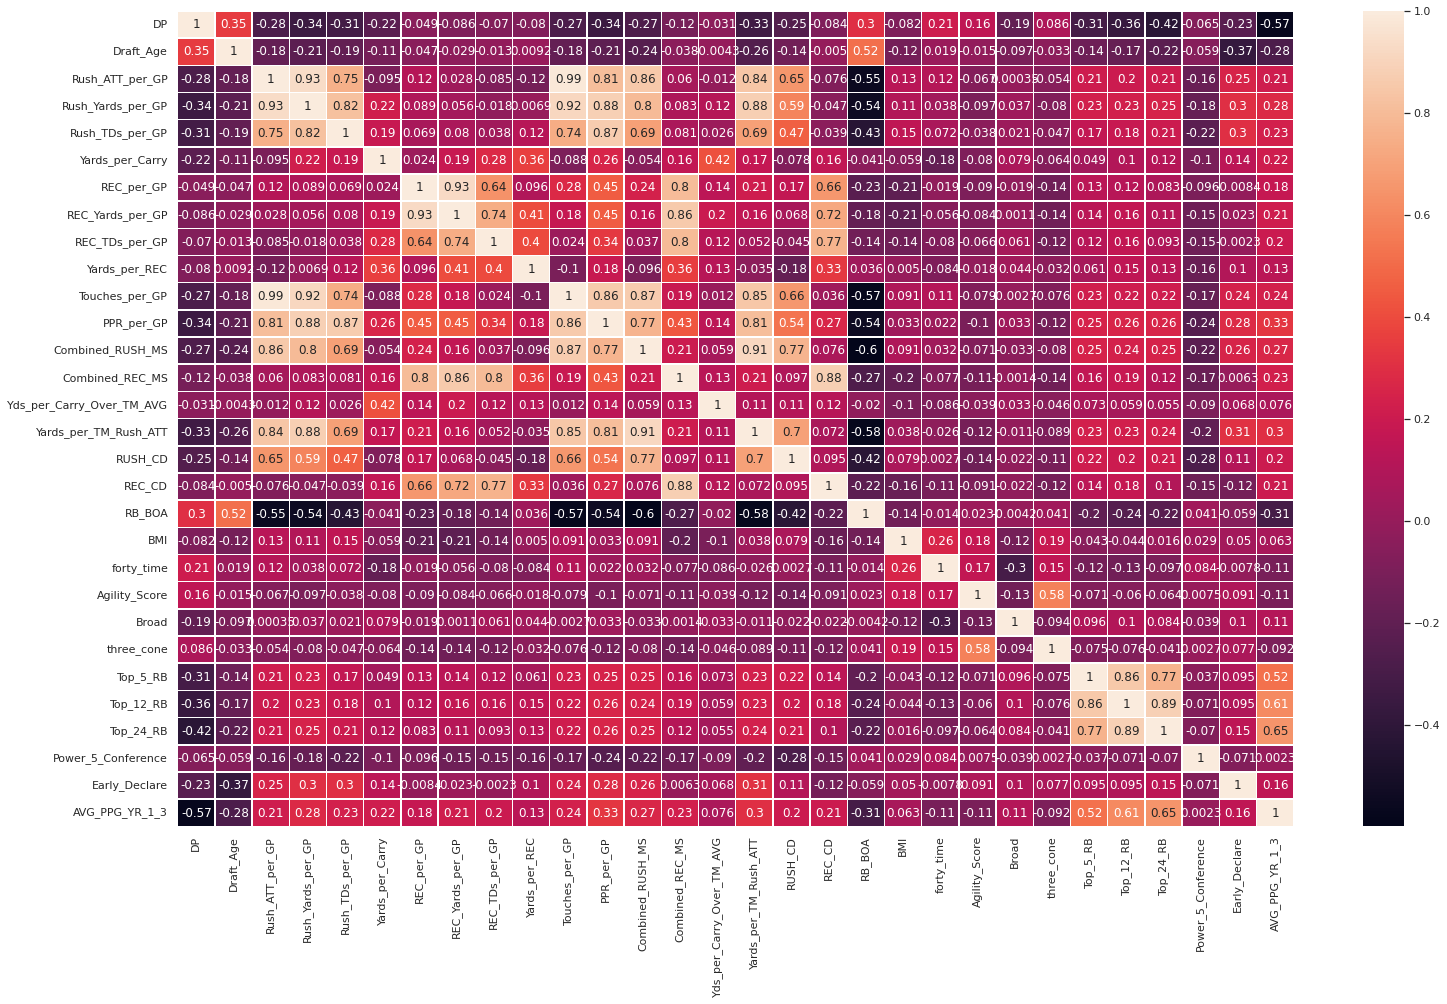

In [88]:
draft_df_corr_mat = draft_df.drop(['Player','Draft_Year','DR'],axis = 1)
f,ax = plt.subplots(figsize=(25, 15))
corrMatrix = draft_df_corr_mat.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.5,ax=ax)
plt.show()

##1.0 - EDA Conclusions

Conclusions:

*   Running backs drafted earlier in the NFL Draft have greater fantasy success
*   Early declares (player who declare they are entering the NFL Draft before their Senior year season) appear to have higher average points per game ceilings
*   No running back with a BMI less than 27.5 has averaged 15 points per game or more in their first 3 seasons
*   Running backs aged 24 or older when drafted have much lower average point per game
*   Running backs with younger breakout ages tended to have a higher average points per game, especially in cases of early declare vs non early declare
*   Average points per game tended to increase with an increase in running back dominator rating
*   Average points per game tended to increase with a younger breakout age
*   Average points per game tended to increase with an increase in combined rushing market share
*   The correlation matrix reveals the predictors with the strongest correlation to average points per game in seasons 1-3 are draft pick, average points per game in college, running back breakout age (RB_BOA), yards per team rush attempt, draft age, and rush yards per game.


#D - Train/Test Split

In [89]:
np.random.seed(10)

predictors = draft_df.drop(['AVG_PPG_YR_1_3','Player', 'Draft_Year','DR', 'Draft_Age', 'Top_5_RB','Top_12_RB','Top_24_RB'],axis = 1)
#target = draft_df[['Player','AVG_PPG_YR_1_3']]

#create test/train
#X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15)

#y_test_player = y_test['Player']
#y_train = y_train.drop(['Player'], axis = 1)
#y_test = y_test.drop(['Player'], axis = 1)


In [90]:
#X_train.info()

In [91]:
#y_train.info()

In [92]:
#X_test.info()

In [93]:
#y_test.info()

#E - Standardization

##1.0 Density Plots

###1.1 Density Plot of Inputs Before Standardization

Text(0.5, 1.0, 'Train Inputs Density Plot')

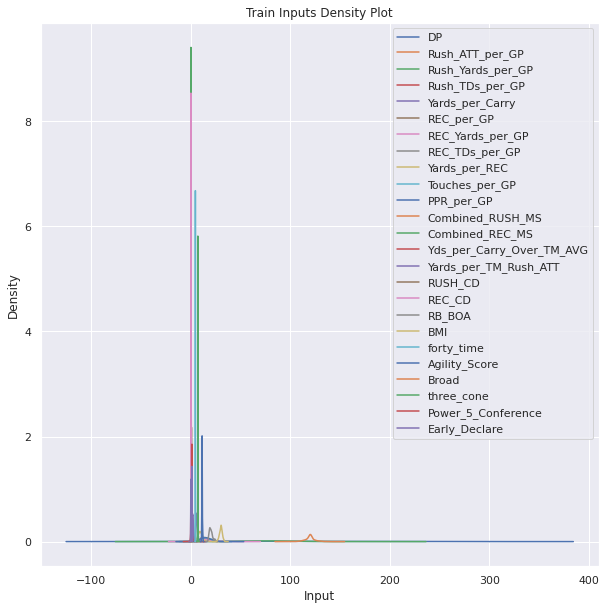

In [94]:
#density plot of inputs
predictors.plot.density(figsize = (10, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Train Inputs Density Plot")

###1.2 - Density Plot of Inputs Post Standardization

In [95]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit and transform
standard_predictors= scaler.fit_transform(predictors)
#standard_X_test = scaler.fit_transform(X_test)

standard_predictors_df = pd.DataFrame(standard_predictors)

Text(0.5, 1.0, 'Standardized Train Inputs Density Plot')

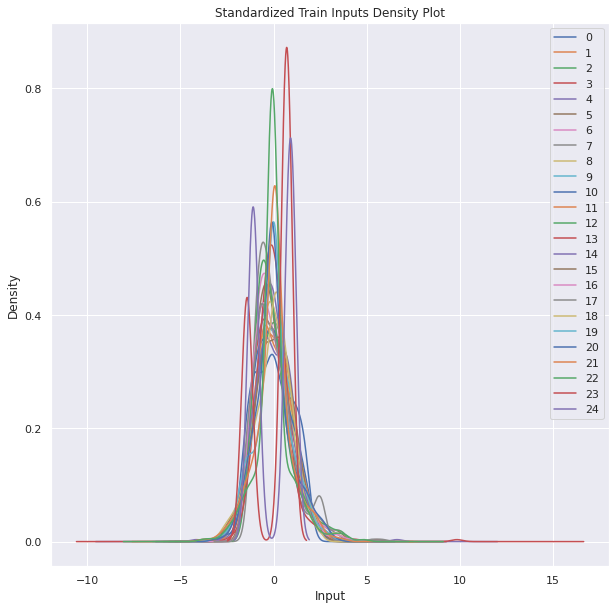

In [96]:
standard_predictors_df.plot.density(figsize = (10, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Standardized Train Inputs Density Plot")

#H - Clustering

##1.0 K-Means Clustering

In [97]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
kmeans_model = KMeans(n_clusters=12)
# fit the model
kmeans_model.fit(predictors)
# assign a cluster to each example
kmeans_yhat = kmeans_model.predict(predictors)
# retrieve unique clusters
kmeans_clusters = unique(kmeans_yhat)

In [98]:
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(predictors)
    distortions.append(kmeanModel.inertia_)

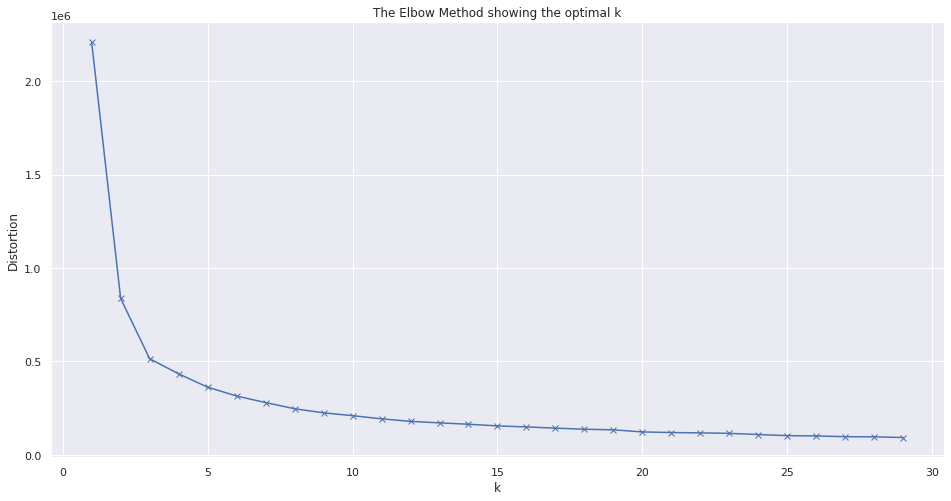

In [99]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The ideal number of clusters determined from the Elbow Method did not separate the data enough for my preferences. Instead, the ideal number of clusters was derived from the rule of thumb of using the square root of half the number of objects. 

##2.0 Cluster Analysis

In [100]:
df_cluster = pd.DataFrame()
df_cluster['player'] =  draft_df['Player']
df_cluster['cluster'] = kmeans_yhat
df_cluster['average_PPG'] = draft_df['AVG_PPG_YR_1_3']
df_cluster['number_of_top_5_season'] = draft_df['Top_5_RB']
df_cluster['number_of_top_12_season'] = draft_df['Top_12_RB']
df_cluster['number_of_top_24_season'] = draft_df['Top_24_RB']

df_cluster['top_5_season'] = np.where((df_cluster.number_of_top_5_season >= 1),1, 0)
df_cluster['top_12_season'] = np.where((df_cluster.number_of_top_12_season >= 1),1, 0)
df_cluster['top_24_season'] = np.where((df_cluster.number_of_top_24_season >= 1),1, 0)

df_cluster = df_cluster.drop(['number_of_top_5_season','number_of_top_12_season','number_of_top_24_season'], axis = 1)

df_cluster.sort_values(by=['average_PPG'],ascending=False, inplace = True)
df_cluster.head(20)


,player,cluster,average_PPG,top_5_season,top_12_season,top_24_season
196,Christian McCaffrey,6,23.4,1,1,1
238,Ezekiel Elliott,6,21.5,1,1,1
188,Saquon Barkley,6,20.6,1,1,1
193,Alvin Kamara,9,20.3,1,1,1
263,David Johnson,10,20.0,1,1,1
338,Le'Veon Bell,1,19.7,1,1,1
461,Chris Johnson,1,19.4,1,1,1
107,Jonathan Taylor,6,19.2,1,1,1
587,Domanick Williams,5,18.8,1,1,1
76,Najee Harris,1,18.2,1,1,1


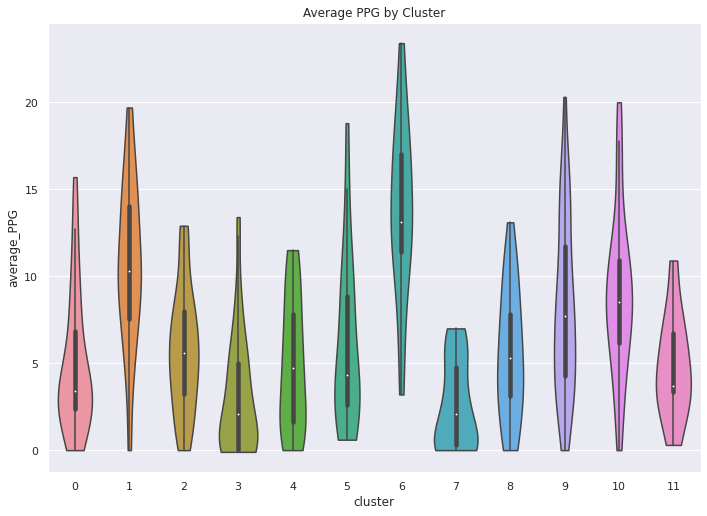

In [101]:
sns.set(rc={'figure.figsize':(11.7,8.27)});


sns.violinplot(data=df_cluster, x='cluster', y="average_PPG", cut=0).set(title = 'Average PPG by Cluster');

###2.1 Cluster Metrics

In [102]:
clusters = [0,1,2,3,4,5,6,7,8,9,10,11]
above_10_percentages = []

for index, cluster in enumerate(clusters):
  above_10_count = len(df_cluster[(df_cluster['average_PPG']>=10) & (df_cluster['cluster']==cluster)])
  count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
  above_10_percentage = round((above_10_count/count_in_cluster)*100,2)
  above_10_percentages.append(above_10_percentage)

In [103]:
top_5_percentages = []
top_12_percentages = []
top_24_percentages = []

for index, cluster in enumerate(clusters):
  top_5_count = len(df_cluster[(df_cluster['top_5_season']>=1) & (df_cluster['cluster']==cluster)])
  top_12_count = len(df_cluster[(df_cluster['top_12_season']>=1) & (df_cluster['cluster']==cluster)])
  top_24_count = len(df_cluster[(df_cluster['top_24_season']>=1) & (df_cluster['cluster']==cluster)])
  count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
  top_5_percentage = round((top_5_count/count_in_cluster)*100,2)
  top_12_percentage = round((top_12_count/count_in_cluster)*100,2)
  top_24_percentage = round((top_24_count/count_in_cluster)*100,2)
  top_5_percentages.append(top_5_percentage)
  top_12_percentages.append(top_12_percentage)
  top_24_percentages.append(top_24_percentage)

In [104]:
df_hit_rate = pd.DataFrame()
df_hit_rate['cluster'] = clusters
df_hit_rate['10+_ppg_%'] = above_10_percentages
df_hit_rate['top_5_season_%'] = top_5_percentages
df_hit_rate['top_12_season_%'] = top_12_percentages
df_hit_rate['top_24_season_%'] = top_24_percentages
df_hit_rate.sort_values(by=['10+_ppg_%'],ascending=False, inplace = True)
df_hit_rate.head(12)

,cluster,10+_ppg_%,top_5_season_%,top_12_season_%,top_24_season_%
6,6,81.48,48.15,70.37,81.48
1,1,56.82,20.45,34.09,63.64
10,10,38.71,16.13,25.81,45.16
9,9,31.25,12.50,21.88,46.88
8,8,18.18,6.06,9.09,27.27
5,5,16.67,8.33,8.33,16.67
4,4,16.00,0.00,0.00,12.00
2,2,13.64,2.27,13.64,22.73
0,0,12.82,2.56,7.69,15.38
11,11,10.00,0.00,10.00,20.00


###2.2 Cluster Conclusions

Observing the cluster dataframe, the highest scoring players fall into clusters 6, 1, 10, and 9. Cluster 6 is by far the best cluster, with 81% of the players averaging 10+ points per game over the first three seasons in the NFL. This cluster also has the highest hit rate for top 5, top 12, and top 24 fantasy finishes at the running back position, with . With high scoring running backs greatly contributing to overall fantasy team success, players in this cluster should be heavily considered when drafting players



##3.0 Save to .csv for Further Analysis in Visualization Software

In [105]:
#Create csv file to use in visualization software
df_cluster.to_csv("RB_clusters.csv")